**Objective**

The objective of milestone-1 is to perform data preprocessing and EDA to understand customer churn. The output of milestone-1 will be used in milestones-2 and 3 to build machine learning models to predict customer churn and to create an interactive dashboard for decision making. In order to do that, follow the solution approach given in the capstone project overview and use the learners file for milestone-1 to answer the business questions.

## Let us start by importing the required libraries 

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

## Import the data  

In [2]:
df= pd.read_csv('milestone1_dataset.csv')

## Data Understanding 

### Write a code to display the first and last 5 rows of the dataset. 

In [3]:
df.head(5)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail(5)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
6494,4310-KEDTB,0,0,No,Yes,26,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.50,No
6495,7254-IQWOZ,1,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,Yes
6496,2474-BRUCM,1,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.30,Yes
6497,4062-HBMOS,1,0,No,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.05,5364.80,No
6498,0742-NXBGR,0,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.30,Yes


### How many rows and columns are present in the data? 

In [5]:
df.shape

(6499, 21)

There are 6499 rows and 21 columns in the dataset.

### What are the datatypes of the different columns in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   int64  
 2   Senior_Citizen     6499 non-null   int64  
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone_Service      6499 non-null   object 
 7   Multiple_Lines     6499 non-null   object 
 8   Internet_Service   6499 non-null   object 
 9   Online_Security    6499 non-null   object 
 10  Online_Backup      6499 non-null   object 
 11  Device_Protection  6499 non-null   object 
 12  Tech_Support       6499 non-null   object 
 13  Streaming_TV       6499 non-null   object 
 14  Streaming_Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless_Billing  6499 

Write down the observations as per the information provided by running the above code.

There are object, float and integer column types in the dataset as observed. 5 numerical and 16 object type columns.

All the columns have 6499 observations except Total Charges which has 6490 observations indicating that there are missing values there.

The object type columns contain categories in them

### Correct the datatype of those columns which are not correct. Also, convert all object datatype columns into category datatypes.

The columns for Gender and Senior citizen even though are integer type do not have any relevance computationally so will be converted to object type variables which can then be converted to categorical data.

In [7]:
df['Gender'] = df['Gender'].astype(str)

In [8]:
df['Senior_Citizen'] = df['Senior_Citizen'].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   object 
 2   Senior_Citizen     6499 non-null   object 
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone_Service      6499 non-null   object 
 7   Multiple_Lines     6499 non-null   object 
 8   Internet_Service   6499 non-null   object 
 9   Online_Security    6499 non-null   object 
 10  Online_Backup      6499 non-null   object 
 11  Device_Protection  6499 non-null   object 
 12  Tech_Support       6499 non-null   object 
 13  Streaming_TV       6499 non-null   object 
 14  Streaming_Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless_Billing  6499 

In [10]:
#Converting the columns with an 'object' datatype into categorical variables
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(5)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         6499 non-null   category
 1   Gender             6499 non-null   category
 2   Senior_Citizen     6499 non-null   category
 3   Partner            6499 non-null   category
 4   Dependents         6499 non-null   category
 5   Tenure             6499 non-null   int64   
 6   Phone_Service      6499 non-null   category
 7   Multiple_Lines     6499 non-null   category
 8   Internet_Service   6499 non-null   category
 9   Online_Security    6499 non-null   category
 10  Online_Backup      6499 non-null   category
 11  Device_Protection  6499 non-null   category
 12  Tech_Support       6499 non-null   category
 13  Streaming_TV       6499 non-null   category
 14  Streaming_Movies   6499 non-null   category
 15  Contract           6499 non-null   category
 16  Paperl

### Check the statistical summary of the data 

In [57]:
df.describe()

,Tenure,Monthly_Charges,Total_Charges,Churn
count,6499.00,6499.00,6499.00,6499.00
mean,32.37,64.73,2281.71,0.26
std,24.58,30.14,2268.70,0.44
min,0.00,18.25,18.80,0.00
25%,9.00,35.40,399.80,0.00
50%,29.00,70.35,1397.10,0.00
75%,55.00,89.85,3778.10,1.00
max,72.00,118.75,8684.80,1.00


The average tenure, monthly charge and total charge is approximately 32 months, 65 and 2,283; with a standard deviation of approximately 24 months, 30 and 2,270. The minimum tenure is 0 month and the maximum tenure of 72 months. The monthly charge ranges from 18.25 to 118.75, while the total charge ranges from 18.80 to 8,684.80.

## Data Preprocessing 

### Check for duplicate entries in the data 

In [13]:
df.duplicated().sum()

0

There are no duplicate entries in the dataset.

### Check if any discrepancy is present in the categorical column values.

In [14]:
df.nunique()

CustomerID           6499
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure                 73
Phone_Service           2
Multiple_Lines          3
Internet_Service        4
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1554
Total_Charges        6046
Churn                   2
dtype: int64

#### Replace the incorrect value with the correct value in the categorical column

There appears to be no incorrect value in the categorical column.

### Are there any missing values in the data? If so, treat them using an appropriate method.

In [15]:
df.isnull().sum()

CustomerID           0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        9
Churn                0
dtype: int64

There are 9 missing values in the column for Total Charges.

#### Let's try to fill in the missing value with the median value of the column.

In [16]:
df['Total_Charges'] = df['Total_Charges'].fillna(value= df['Total_Charges'].median())

In [17]:
df.isnull().sum()

CustomerID           0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn                0
dtype: int64

##### Now, after handling the missing values and also checking the data types, let's visualise the dataset.

##  Data Visualization 

In addition to the observations, perform each of the five relevant univariate and bivariate analyses of different columns with the help of the below functions.

### Univariate Analysis  



Before doing the visualization, please run the below codes:

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Do the univariate analysis of different integer and categorical variables and write down the observations. 
Hint: Plot different visualizations using the above function

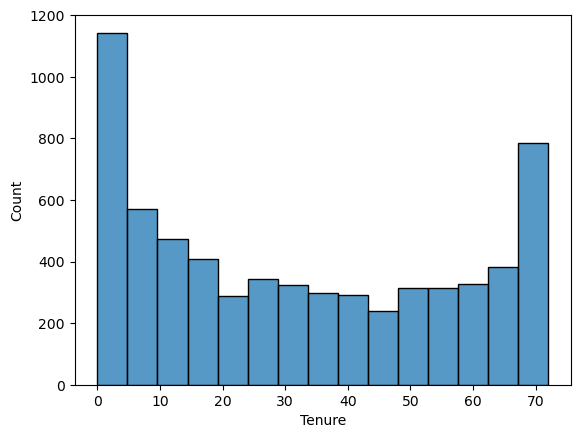

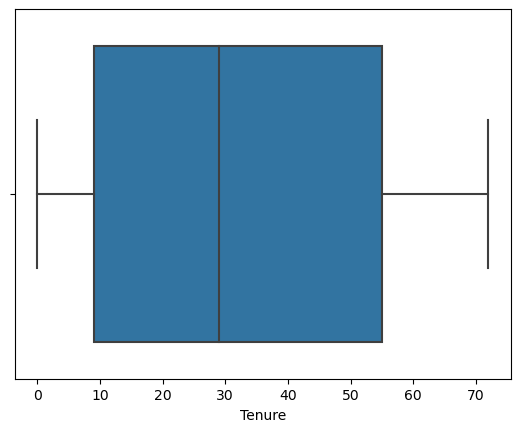

In [22]:
sns.histplot(data=df,x='Tenure')
plt.show()
sns.boxplot(data=df,x='Tenure')
plt.show()

The distribution of Tenure is slightly right skewed with an average tenure of less than.There are no outliers.

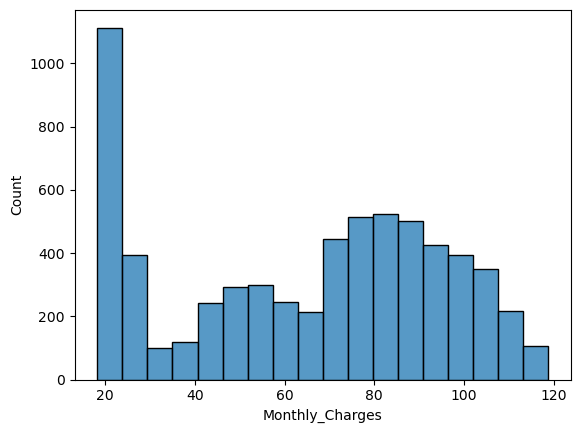

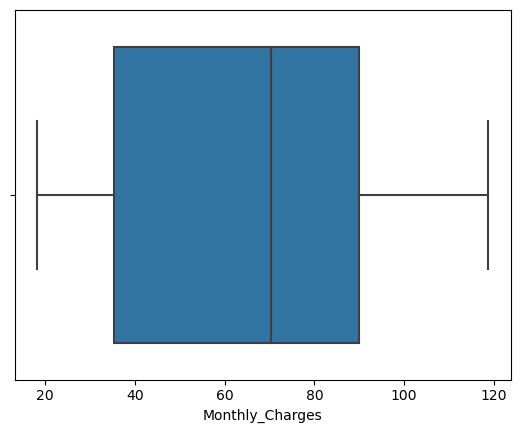

In [23]:
sns.histplot(data=df,x='Monthly_Charges')
plt.show()
sns.boxplot(data=df,x='Monthly_Charges')
plt.show()

The distribution of monthly charges is left skewed. There are no outliers in the distribution.sns.countplot(data=df,x='hday')

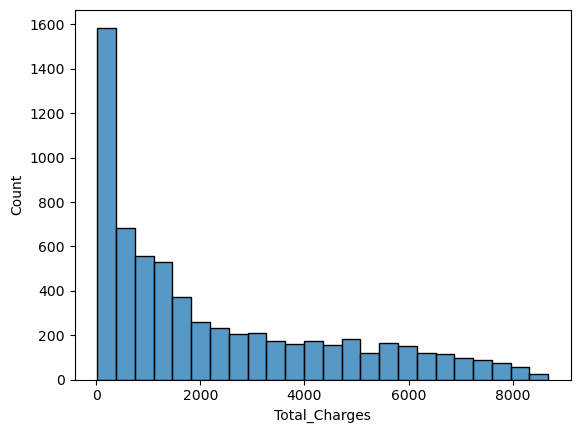

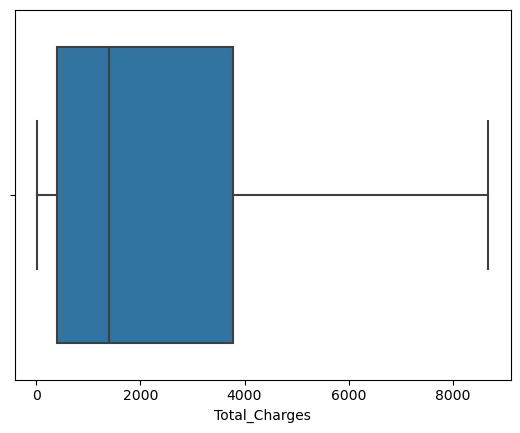

In [24]:
sns.histplot(data=df,x='Total_Charges')
plt.show()
sns.boxplot(data=df,x='Total_Charges')
plt.show()

The distribution of Total charges is right skewed, 50% of the total charges are above 1,000 indicating high total charges overall. There are no outliers in the distribution.


### Bivariate Analysis 

#### Plot the heatmap.

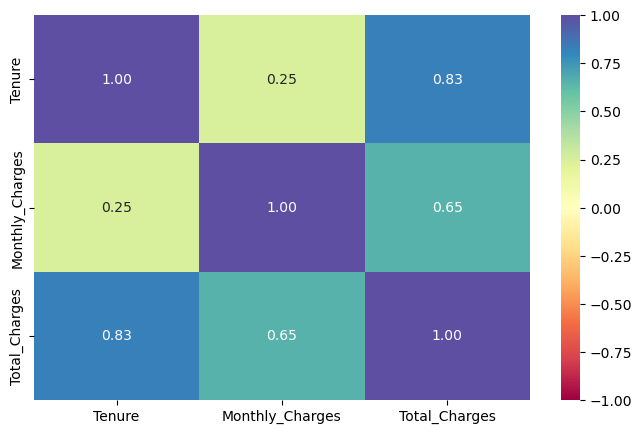

In [25]:
corr = df.corr()

# ploting a heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


There appears to be a very high positive correlation between Tenure and Total Charges. This makes sense as the longer a customer has stayed with the company, the longer the total charges he/she has paid to the company for the services rendered. There's also a slightly high positive correlation with the monthly charges and total charges, hence, as the monthly charge goes up, the total charges does as well. There's not a very high correlation between the customer's tenure and the monthly charge(s).
 

#### Do the bivariate analysis between column name - "Churn" and different integer and categorical variables and write down the observations. 


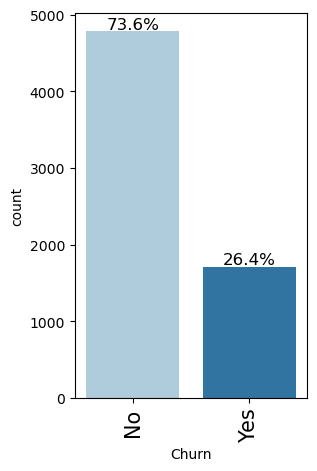

In [26]:
labeled_barplot(df, "Churn", perc=True)

26.4% of customers churned the service, while 73.6% did not. The number of customers that churned the service is slightly above a quarter of the total number of customers.

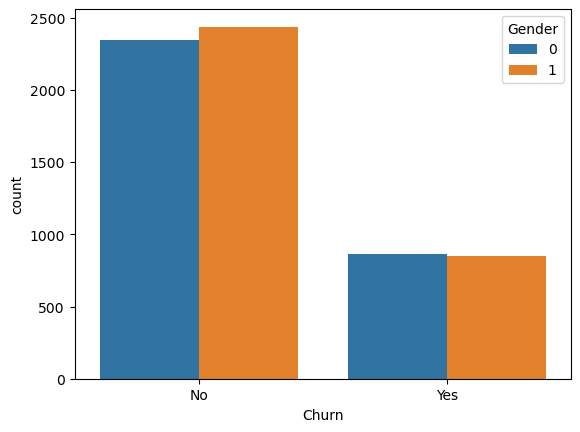

In [27]:
sns.countplot(data=df,x='Churn', hue= 'Gender');

There appears to be no significant impact of the customers gender in deciding if the customer is churned or not as there is number of male and female customers that were churned is almost the same.

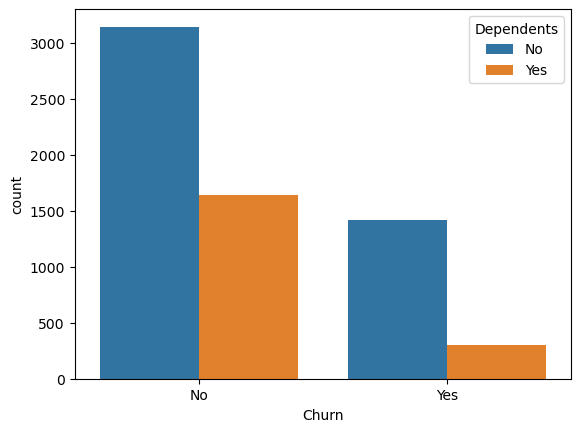

In [28]:
sns.countplot(data=df,x='Churn', hue= 'Dependents');

A majority of Customers with no dependents were churned, this seems to indicate that the number of dependents a customer has is not a strong influencing factor on if the customer will be churned or not.

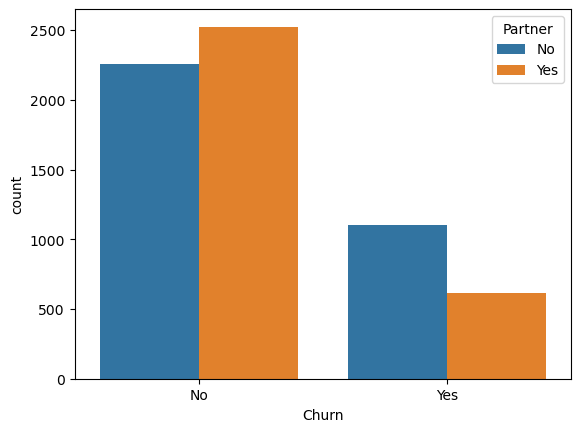

In [29]:
sns.countplot(data=df,x='Churn', hue= 'Partner');

Observing the graph above, Customers with no partners appear more likely to be churned than customers with a partner.

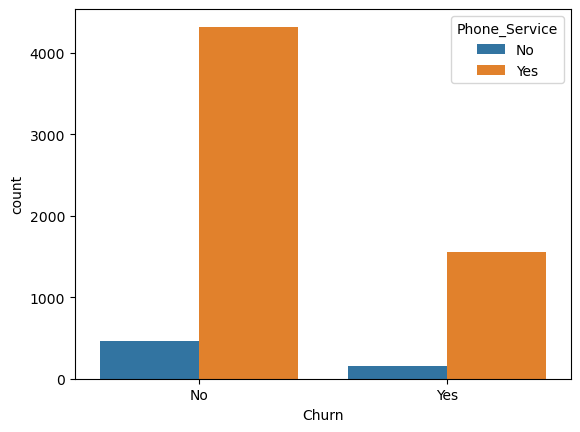

In [30]:
sns.countplot(data=df,x='Churn', hue= 'Phone_Service');

As observed above, customers with phone services are less likely to be churned. 

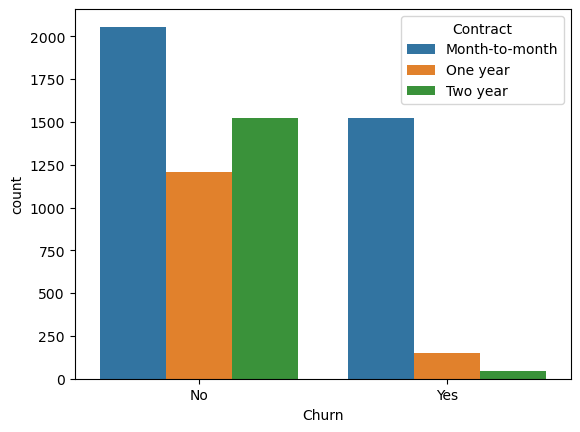

In [31]:
sns.countplot(data=df,x='Churn', hue= 'Contract');

Even though it is observed that the majority of customers that are not churned opt for the month to month contract, it can also be seen that these customers are also most likely to be churned.

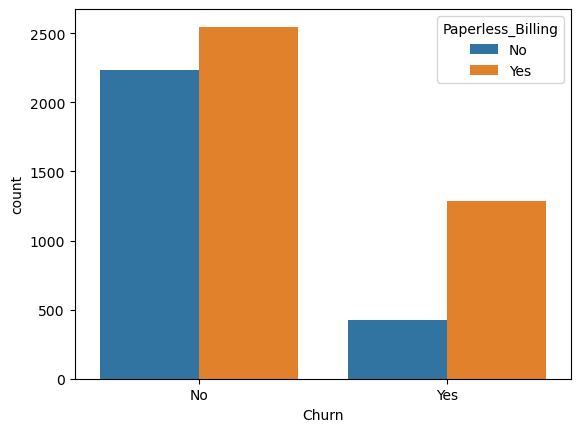

In [32]:
sns.countplot(data=df,x='Churn', hue= 'Paperless_Billing');

Customers with paperless billing are likely to be churned as observed above.

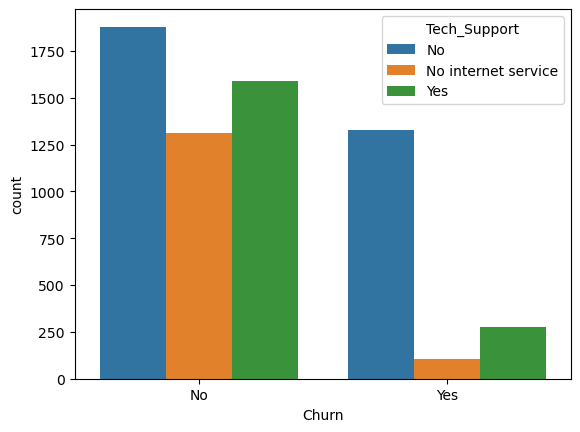

In [33]:
sns.countplot(data=df,x='Churn', hue= 'Tech_Support');

Customers with no tech support were more likely to be churned as observed in the graph above.

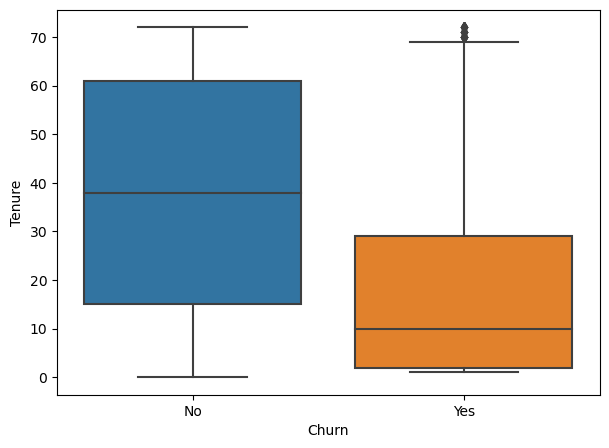

In [34]:
plt.figure(figsize=(7,5))           
sns.boxplot(x=df['Churn'], y=df['Tenure'])
plt.ylabel('Tenure')
plt.xlabel('Churn')
plt.show()

The distribution of customers that are churned have tenures that are right skewed, with a mean lower than that of customers that were not churned. There are a few outliers to the right of the mean and maximum.

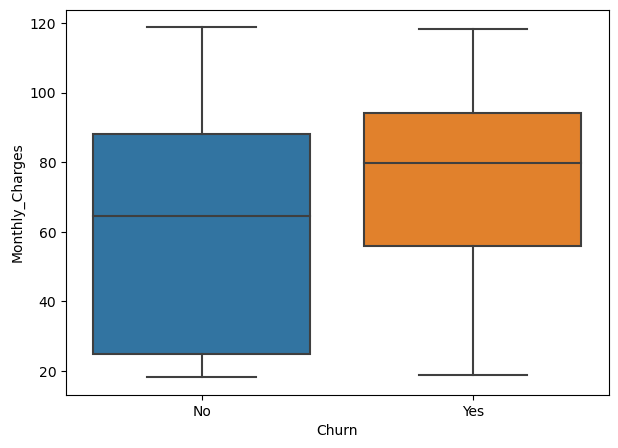

In [35]:
plt.figure(figsize=(7,5))           
sns.boxplot(x=df['Churn'], y=df['Monthly_Charges'])
plt.ylabel('Monthly_Charges')
plt.xlabel('Churn')
plt.show()

The distribution of customers that are churned have monthly charges that are right skewed with a mean monthly charge higher than that of customers that are churned. Hence, customers with higher monthly charges are more likely to churn.

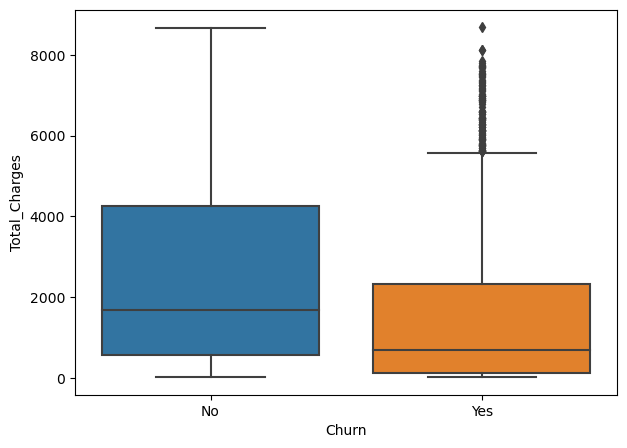

In [36]:
plt.figure(figsize=(7,5))           
sns.boxplot(x=df['Churn'], y=df['Total_Charges'])
plt.ylabel('Total_Charges')
plt.xlabel('Churn')
plt.show()

The distribution of customers that are churned have total charges that are right skewed with a lot of outliers to the right of the mean and maximum.

## Answering business questions  

In [37]:
#Making Fibre-optic the same as Fibre optic
df['Internet_Service'] = df['Internet_Service'].apply(lambda x: x.replace('-',' '))

In [38]:
Table1 = pd.crosstab(index=df["Contract"], 
                           columns=df["Payment_Method"])

Table1

Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,542,498,1707,829
One year,357,370,321,310
Two year,527,538,154,346


- Electronic checks are the preferred payment method for customers on a month to month contract with 1707 customers using it.
- Credit cards and automatic bank transfers are the preferred payment methods for customers on a one year and two years contract.

##### [Q2] - Display a table to show the relationship between payment and internet service and write down the observations.

In [39]:
Table2 = pd.crosstab(index=df["Internet_Service"], 
                           columns=df["Payment_Method"])

Table2

Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Internet_Service,,,,
DSL,520,549,584,564
Fiber optic,594,553,1482,231
No,312,304,116,690


- Electronic checks are the preferred payment method for customers using the DSL and Fiber optic internet service.

##### [Q3] - Display a table to show the relationship between contracts and internet service and write down the observations.


In [40]:
Table3 = pd.crosstab(index=df["Internet_Service"], 
                           columns=df["Contract"])

Table3

Contract,Month-to-month,One year,Two year
Internet_Service,,,
DSL,1121,518,578
Fiber optic,1964,494,402
No,491,346,585


Majority of the customers on the month to month contract are subscribed to the Fiber optic internet service, while a majority of customers on the one and two year contract are subscribed to the DSL internet service.

##### [Q4] - Are there any outliers in the numerical columns 



Observations: There are outliers in the columns for 'Tenure' and 'Total_Charges' as seen in the boxplots above.

##### [Q5] -  What is the percentage of customers who cancelled their subscription?

In [41]:
df.Churn.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No     73.6%
Yes    26.4%
Name: Churn, dtype: object

Approximately 26% of customers cancelled their subscription.

##### [Q6] - What is the average monthly charge for different types of internet services?

In [42]:
Avg_Monthly_Charge = df.groupby(['Internet_Service']).mean()[['Monthly_Charges']].reset_index() # reset_index will reset the index of dataframe to default indexing (0 to number of rows minus 1)

Avg_Monthly_Charge

,Internet_Service,Monthly_Charges
0,DSL,58.21
1,Fiber optic,91.48
2,No,21.10


Fiber optic internet services is the highest income earner for the company.

##### [Q7] - What is the total revenue for different Internet Services?

In [43]:
Total_Charges = df.groupby(['Internet_Service']).sum()[['Total_Charges']].reset_index() 

Total_Charges

,Internet_Service,Total_Charges
0,DSL,4712642.65
1,Fiber optic,9167144.90
2,No,949035.65


The company makes the highest total revenue from Fiber optic and DSL internet services offered to their customers.

##### [Q8] - What is the average tenure for different contracts?

In [44]:
Avg_tenure = df.groupby(['Contract']).mean()[['Tenure']].reset_index() # reset_index will reset the index of dataframe to default indexing (0 to number of rows minus 1)

Avg_tenure

,Contract,Tenure
0,Month-to-month,17.95
1,One year,41.87
2,Two year,57.07


The Average Tenure for month to month tenure is approximately 18 months, 42 months for a one year contract and 57 months on average for a 2 year contract. This suggests that longer term contracts are preferable in ensuring customer retention and prevent churning.

##### [Q9] - What percentage of customers have online protection?

In [45]:
df.Online_Backup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No                     43.9%
Yes                    34.2%
No internet service    21.9%
Name: Online_Backup, dtype: object

Approximately 34% of customers have online protection.

##### [Q10] - Write a code to replace 'Yes' with 1 and 'No' with 0 in the Churn column.

In [46]:
#label encoding for all categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [47]:
df.head(5)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Summary:


- The number of existing customers that churned is a little above 25% of the total number of customers.
- Customers who churned have a higher mean monthly charge than customers who retained their subscription. 
- Majority of the customers on the month to month contract are subscribed to the Fiber optic internet service, while a majority of customers on the one and two year contract are subscribed to the DSL internet service.
- A majority of Customers with no dependents were churned, this seems to indicate that the number of dependents a customer has is not a strong influencing factor on if the customer will be churned or not.
- Majority of customers that churned were subscribed for the month to month contract.
- Customers with no tech support are more likely to be churned.
- Electronic checks are the preferred payment method for customers on a month to month contract.
- Credit cards and automatic bank transfers are the preferred payment methods for customers on a one year and two years contract.
- Customers with phone services are less likely to be churned.

### Now our EDA part is done. Export the data and use the exported data to be used in Milestone 2 for building machine learning models.

In [59]:
### Export the dataset to be used for next milestone
df.to_csv('A2Z_milestone_2_3_input.csv', index=False)